# Library imports and data loading

In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [15]:
TOP_FOLDER = "/Volumes/PAULHD2/tweets/monthly_count/"
TERRORISM_FILE = TOP_FOLDER + 'short_terrorism.csv'
DOMESTIC_FILE = TOP_FOLDER + 'domestic_security.csv'

In [16]:
terrorism_raw = pd.read_csv(TERRORISM_FILE, index_col=0)
domestic_raw = pd.read_csv(DOMESTIC_FILE, index_col=0)

In [17]:
print(len(terrorism_raw))
terrorism_raw.head()

29592


,date,tweets,article
0,2012-01-01,7,abu_sayyaf
1,2012-01-02,1,abu_sayyaf
2,2012-01-03,5,abu_sayyaf
3,2012-01-04,22,abu_sayyaf
4,2012-01-05,93,abu_sayyaf


In [18]:
print(len(domestic_raw))
domestic_raw.head()

26304


,date,tweets,article
0,2012-01-01,11,air_marshal
1,2012-01-02,13,air_marshal
2,2012-01-03,9,air_marshal
3,2012-01-04,9,air_marshal
4,2012-01-05,7,air_marshal


# Data cleaning and exploration

In [19]:
terrorism_raw['date'] = pd.to_datetime(terrorism_raw.date)
terrorism_raw.dtypes

date       datetime64[ns]
tweets              int64
article            object
dtype: object

In [20]:
domestic_raw['date'] = pd.to_datetime(domestic_raw.date)
domestic_raw.dtypes

date       datetime64[ns]
tweets              int64
article            object
dtype: object

In [21]:
print(terrorism_raw.article.nunique())
print(domestic_raw.article.nunique())

27
24


In [22]:
print(terrorism_raw.isna().sum())
print(domestic_raw.isna().sum())

date       0
tweets     0
article    0
dtype: int64
date       0
tweets     0
article    0
dtype: int64


In [23]:
print(terrorism_raw.date.min(), terrorism_raw.date.max())
print(domestic_raw.date.min(), domestic_raw.date.max())

2012-01-01 00:00:00 2014-12-31 00:00:00
2012-01-01 00:00:00 2014-12-31 00:00:00


In [24]:
def plot_articles(df):
    for article in df.article.unique():
        monthly = df[df.article == article].groupby(pd.Grouper(key='date', freq='M')).sum()
        plt.figure(figsize=(15,3))
        plt.plot(monthly)
        plt.title(article)
        plt.show()

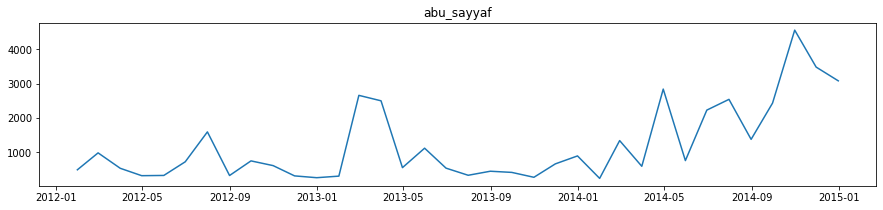

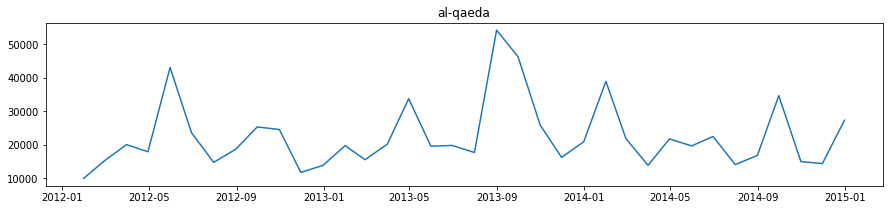

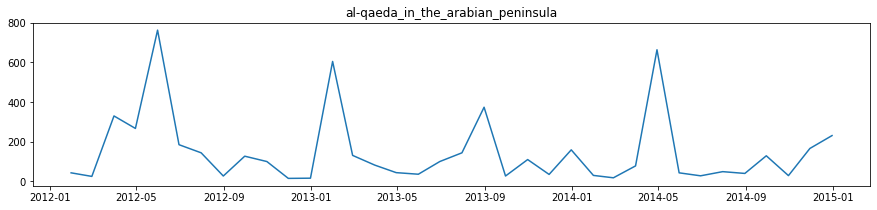

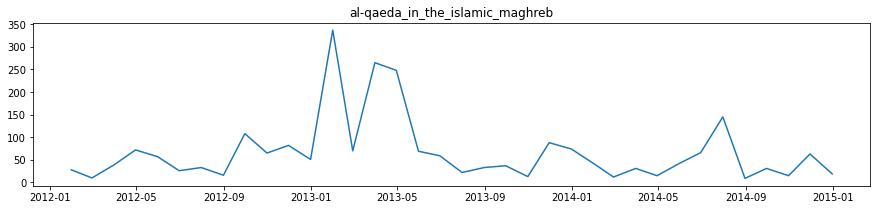

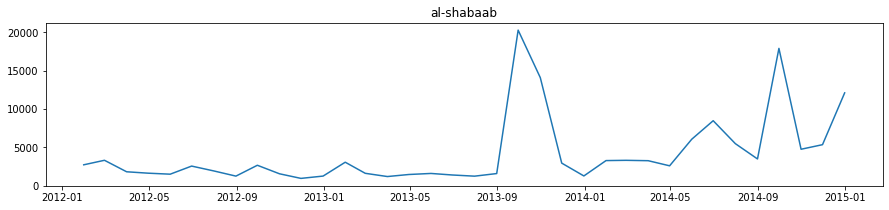

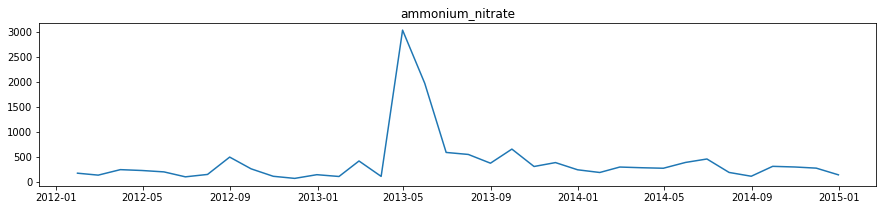

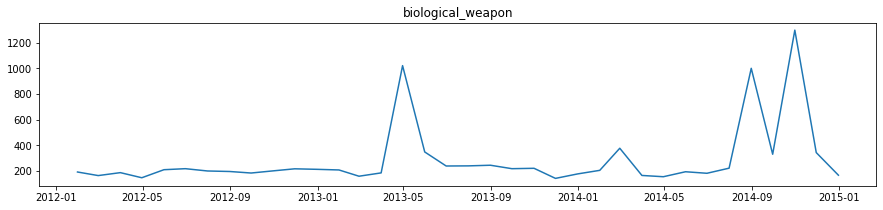

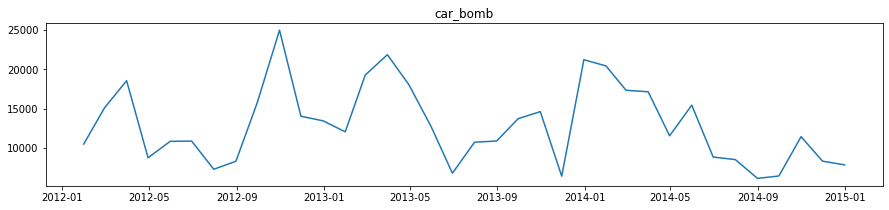

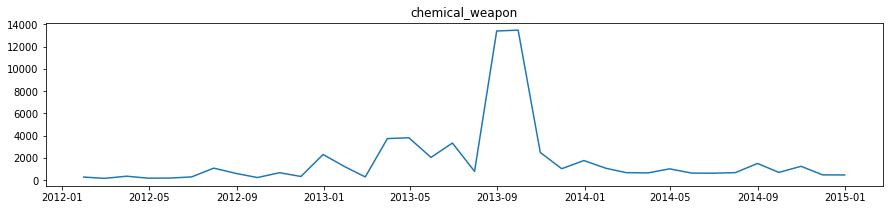

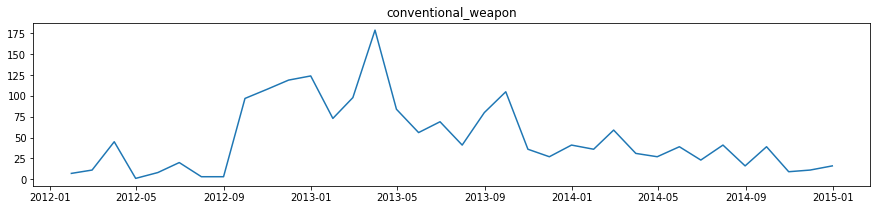

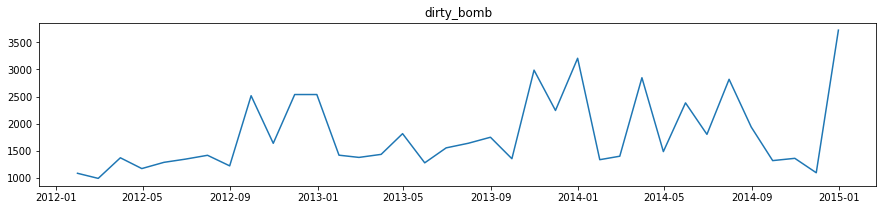

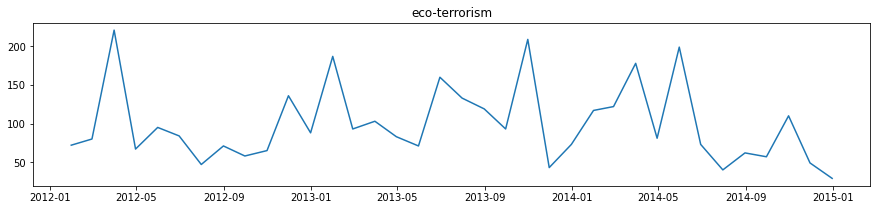

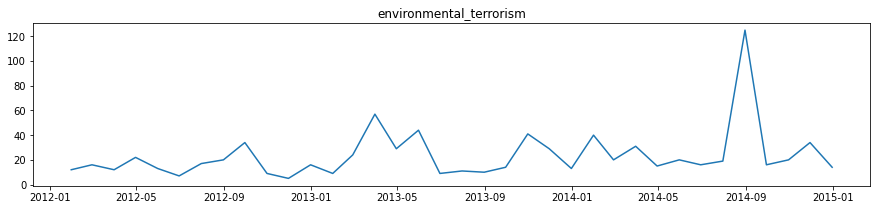

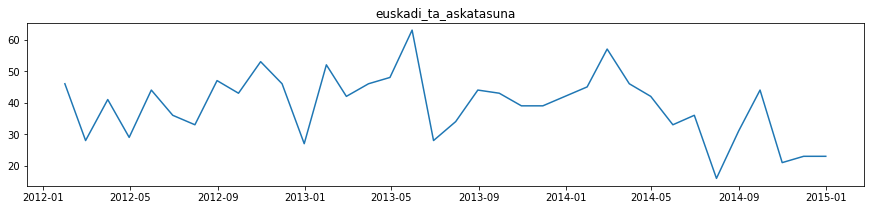

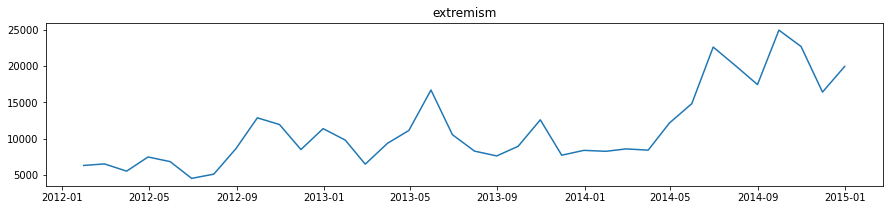

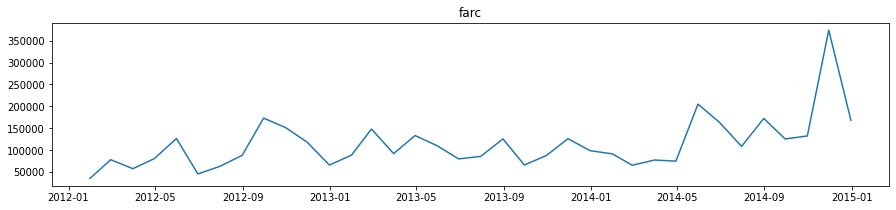

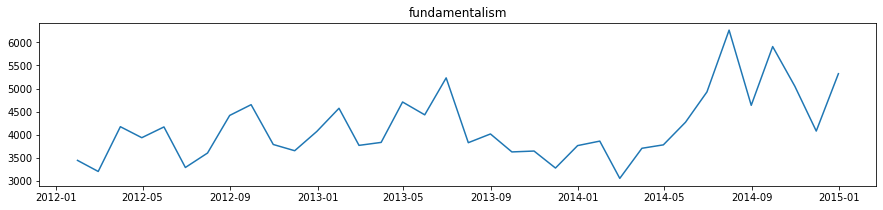

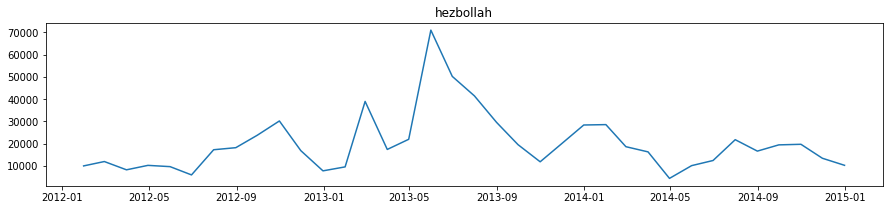

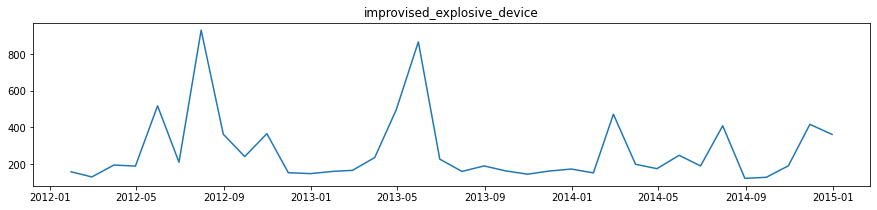

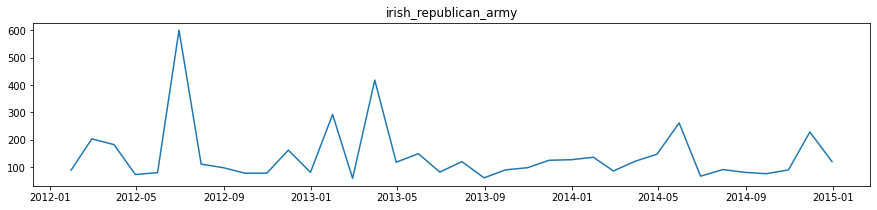

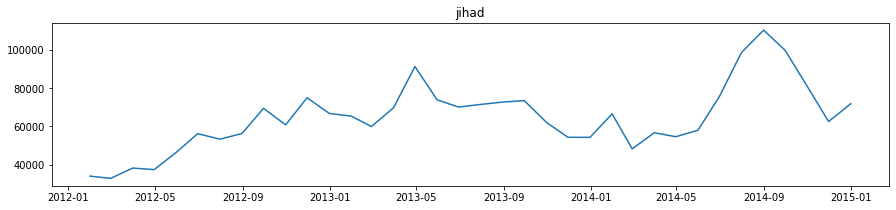

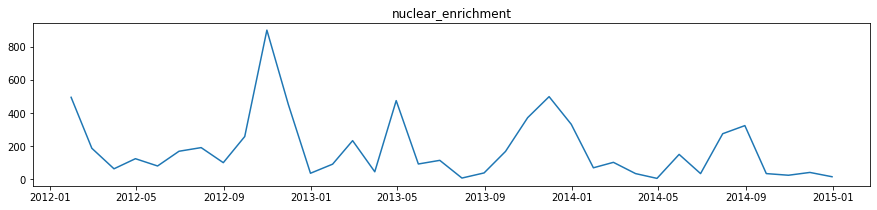

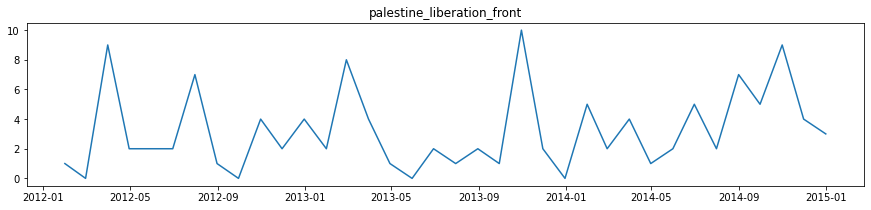

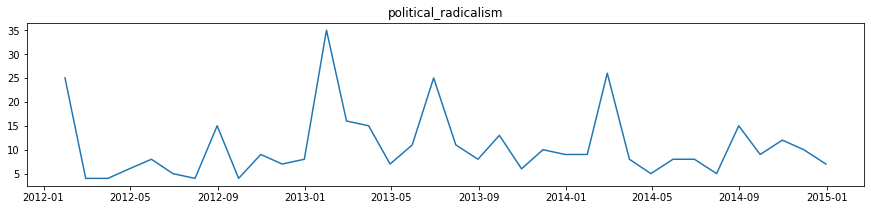

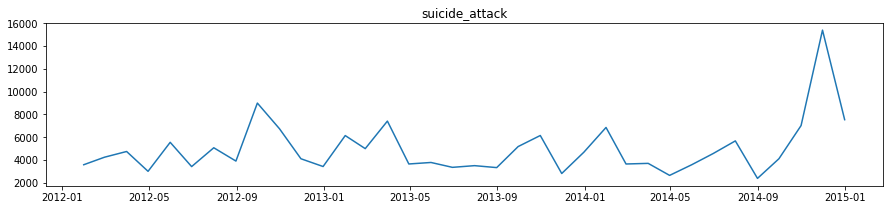

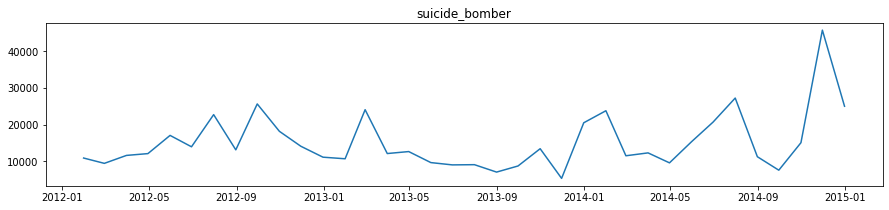

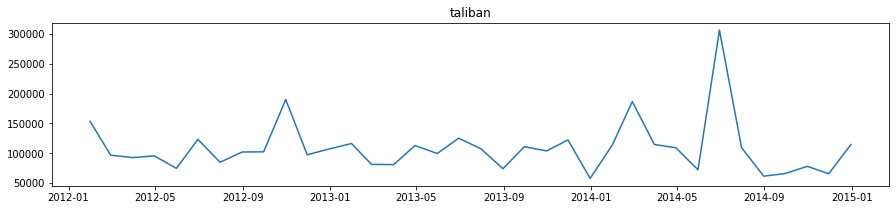

In [25]:
plot_articles(terrorism_raw)

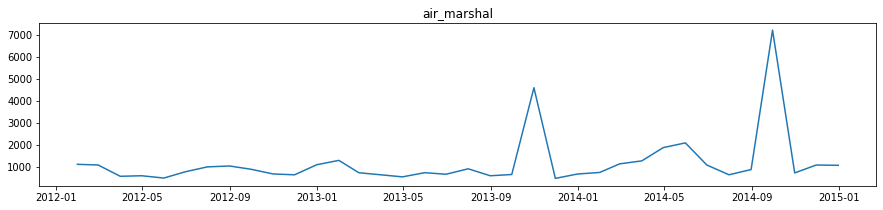

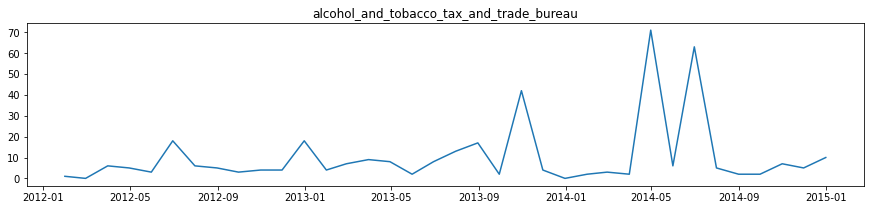

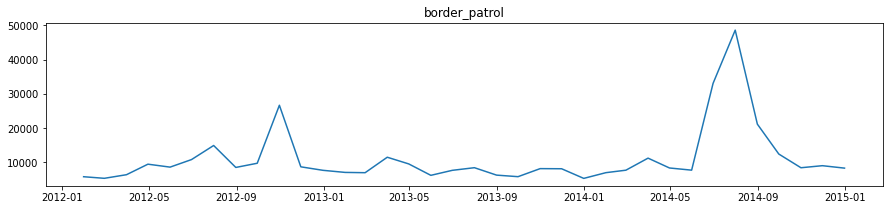

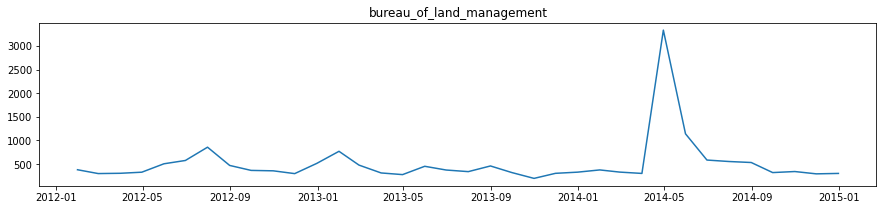

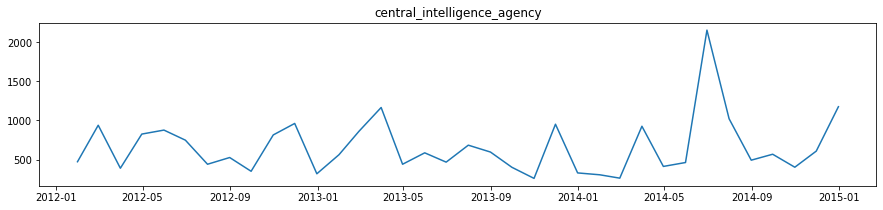

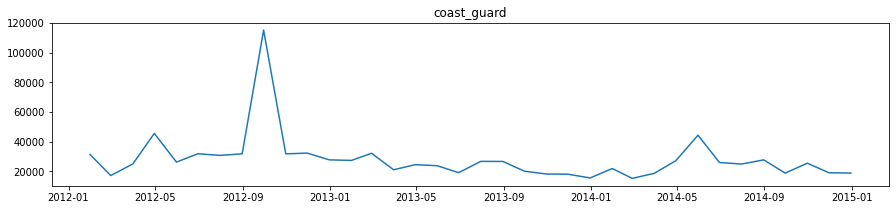

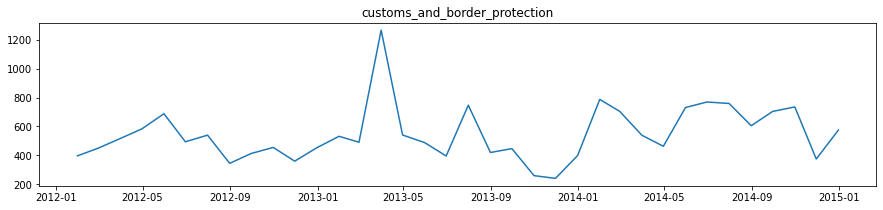

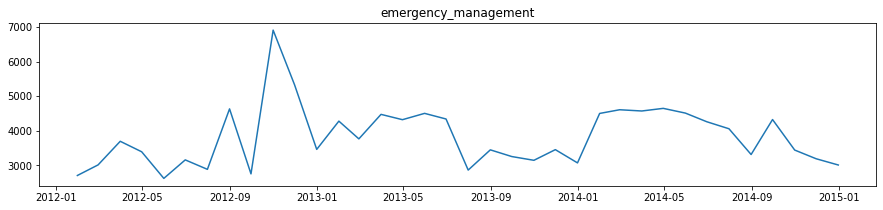

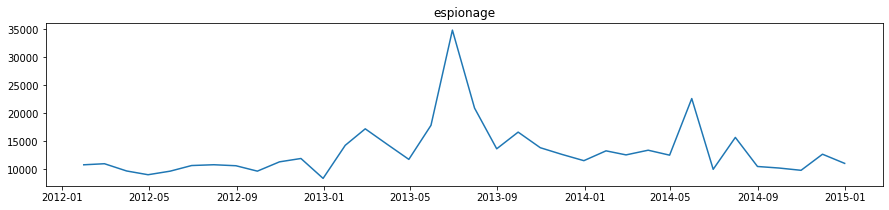

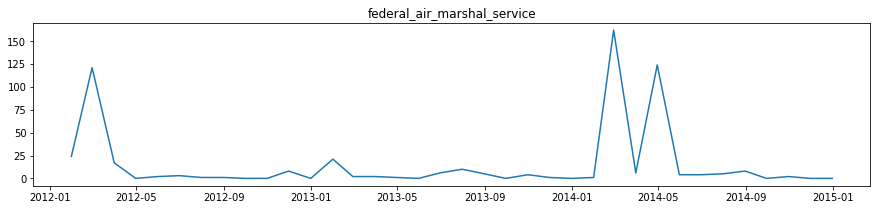

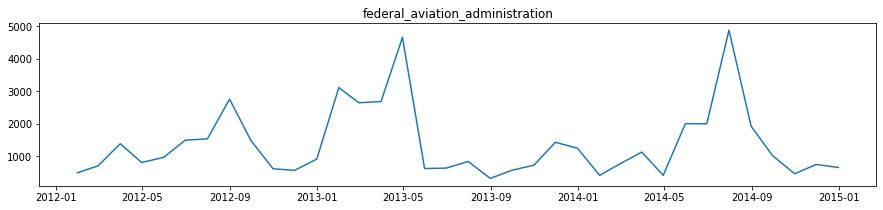

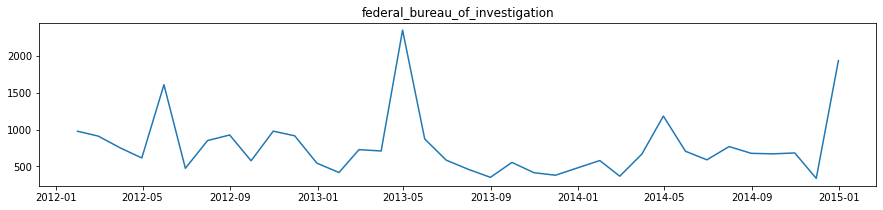

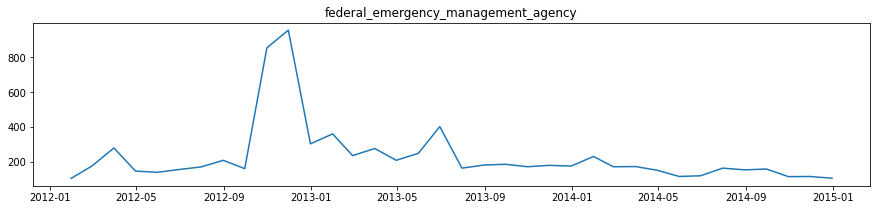

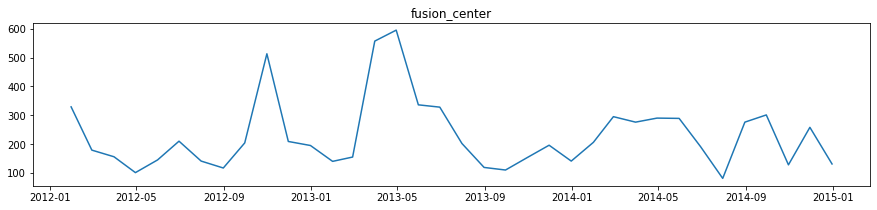

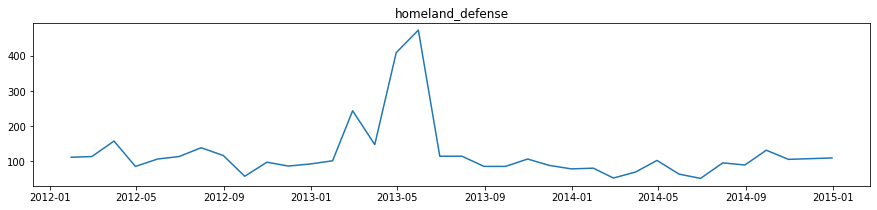

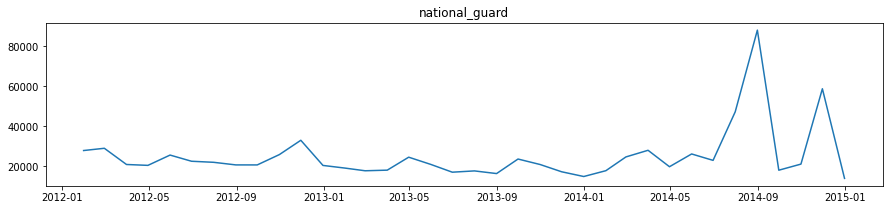

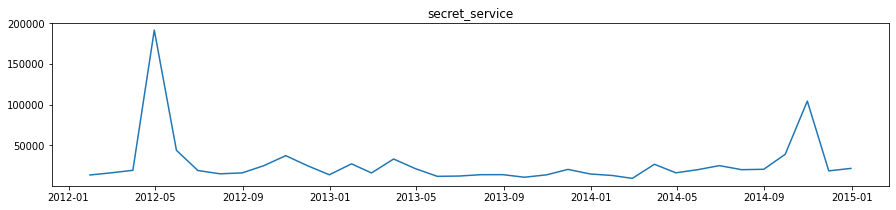

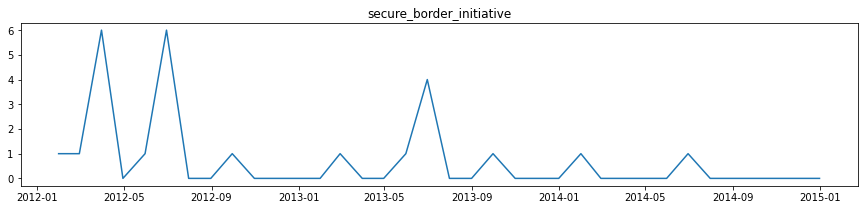

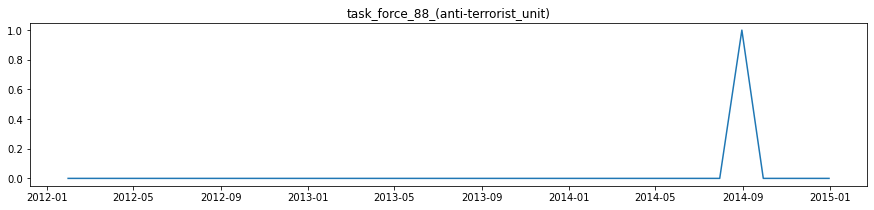

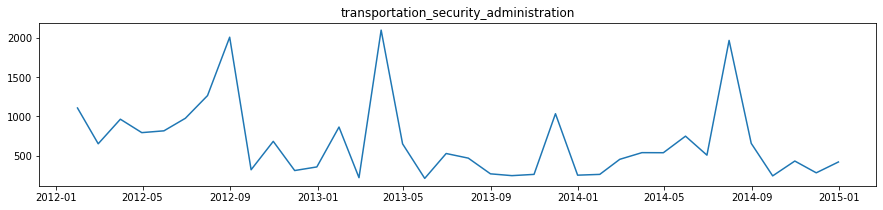

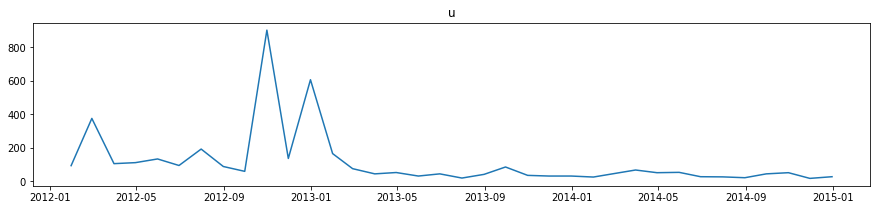

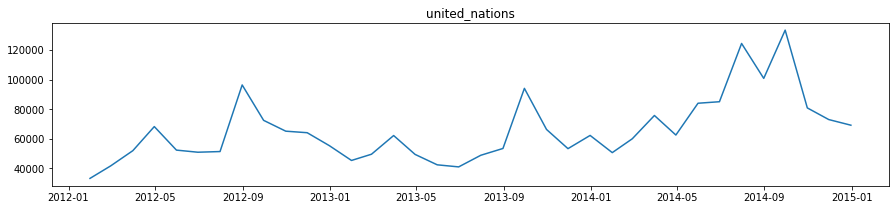

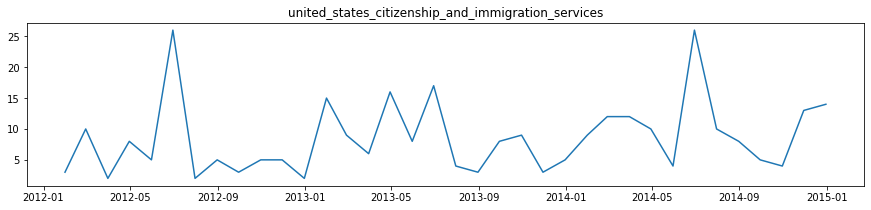

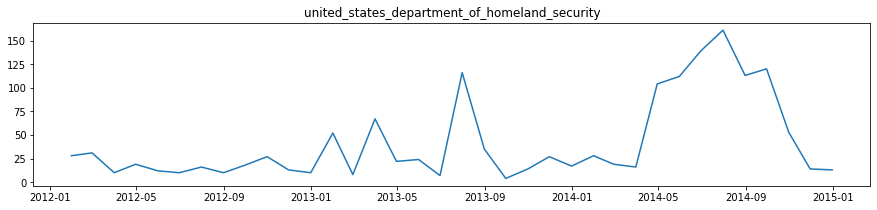

In [26]:
plot_articles(domestic_raw)

In [28]:
terrorism = terrorism_raw.copy()
domestic = domestic_raw.copy()

# Data processing

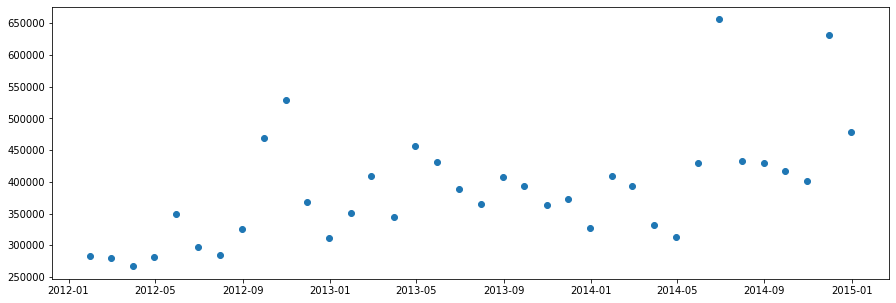

In [34]:
plt.figure(figsize=(15,5))
monthly_count = terrorism.groupby(pd.Grouper(key='date', freq='M')).sum().reset_index()
plt.scatter(x=monthly_count.date, y=monthly_count.tweets)

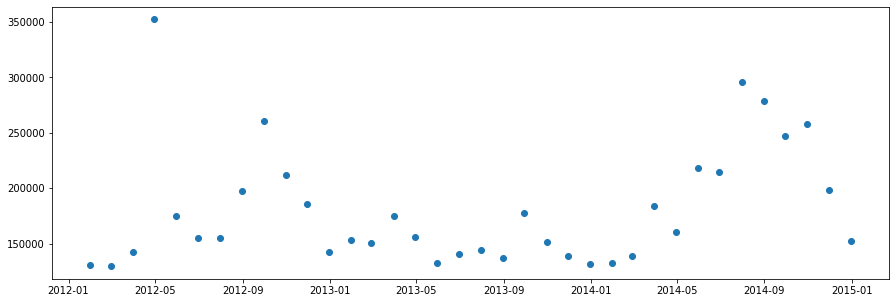

In [35]:
plt.figure(figsize=(15,5))
monthly_count = domestic.groupby(pd.Grouper(key='date', freq='M')).sum().reset_index()
plt.scatter(x=monthly_count.date, y=monthly_count.tweets)